In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from itertools import cycle
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from scipy import interp
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [225]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [10]:
data_read=pd.read_csv("/Volumes/Samsung_T5/UDAI_PCA_BISSAN/LATEST_ANALYSIS/FINAL_USED_DATA/AllData_includingNonsignificant_ContinuousSensQUARTILED_ReadyforAnalysis_wMutation.txt",sep="\t")
data_read.head()

,Mutation_Status,Drug,CellLine,Quartile,ContinousSensitivity,AKT308_phos,AKT473_phos,ATF2_phos,AXL_phos,bCATENIN_phos,...,NCOR2_mut,ZNF543_mut,OR5T2_mut,GLI2_mut,SMARCA4_mut,KIAA1211_mut,TENM3_mut,TG_mut,SV2C_mut,RIMS2_mut
0,KRAS_mutant,AUY922,A549,2,0.183428,1.723378,1.382587,0.525571,0.280380,0.198916,...,0,0,0,0,1,0,0,0,0,0
1,Wild_type,AUY922,CORL105,1,0.037535,1.692594,1.174550,0.223668,0.201581,0.248734,...,0,0,0,0,0,0,0,0,0,0
2,KRAS_mutant,AUY922,H1373,2,0.182295,0.063956,-0.261689,0.343909,0.348465,0.229829,...,0,0,0,0,0,1,1,0,1,1
3,Wild_type,AUY922,H1437,3,0.390510,0.033780,-1.139547,-0.596475,-0.272233,-0.665473,...,0,0,0,0,0,0,0,0,0,0
4,Wild_type,AUY922,H1563,3,0.283711,-0.708120,-0.385513,0.096124,-0.066325,-0.009997,...,1,0,1,1,0,0,0,1,1,0


In [11]:
tobepredicted=data_read['Quartile']

In [37]:
predictors=data_read.iloc[:,58:]

In [38]:
predictors.head()

,VWA8_mut,LAMA1_mut,KEAP1_mut,OR14C36_mut,KMT2C_mut,AKR1B15_mut,VPS13C_mut,CAPN15_mut,LAMA5_mut,PSMC3_mut,...,NCOR2_mut,ZNF543_mut,OR5T2_mut,GLI2_mut,SMARCA4_mut,KIAA1211_mut,TENM3_mut,TG_mut,SV2C_mut,RIMS2_mut
0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
3,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,1,1,0


In [16]:
#train_predictors,test_predictors,train_tobepredicted,test_tobepredicted=train_test_split(predictors,tobepredicted,test_size=0.3,random_state=1)

In [20]:
#train_predictors.shape
#test_predictors.shape
#train_tobepredicted.shape
#test_tobepredicted.shape

(171, 53)

(74, 53)

(171,)

(74,)

In [14]:
np.any(np.isnan(predictors))

AKT308_phos             False
AKT473_phos             False
ATF2_phos               False
AXL_phos                False
bCATENIN_phos           False
CHK1_phos               False
CHK2_phos               False
cJUN_phos               False
cKIT_phos               False
cMET_phos               False
cRAF_phos               False
EGFR_phos               False
ERK/MAPK_phos           False
FAK_phos                False
FGFR1_phos              False
FGFR2_phos              False
FGFR3_phos              False
FLT3_phos               False
GSK3a_phos              False
GSK3B_phos              False
HER2_phos               False
HER3_phos               False
HER4_phos               False
HSP27_phos              False
HSP27(total)_phos       False
IGF1R_phos              False
IGF1R (pan TYR)_phos    False
IR_phos                 False
IR (pan TYR)_phos       False
IRS1_phos               False
                        ...  
DSCAM_mut               False
KIAA0907_mut            False
OR6N2_mut 

In [39]:
from sklearn.linear_model import ElasticNetCV
cv_model=ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

X = predictors
y = tobepredicted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

cv_model.fit(predictors, tobepredicted)


print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)



Optimal alpha: 0.11521397
Optimal l1_ratio: 0.100
Number of iterations 1


In [53]:
from sklearn.linear_model import ElasticNet
actual_model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
actual_model.fit(predictors, tobepredicted)
print(metrics.r2_score(tobepredicted, actual_model.predict(predictors)))
print(np.sqrt(metrics.mean_squared_error(tobepredicted, actual_model.predict(predictors))))

0.0
1.1162052689427961


In [41]:
preds = actual_model.predict(predictors)

In [42]:
preds[preds<1.5]=1
preds[(preds>1.5) & (preds<=2.5)]=2
preds[(preds>2.5) & (preds<=3.5)]=3
preds[preds>3.5]=4

In [43]:
preds.shape

(245,)

In [44]:
metrics.accuracy_score(tobepredicted,preds)

0.2530612244897959

# Confusion Matrix - Coloured

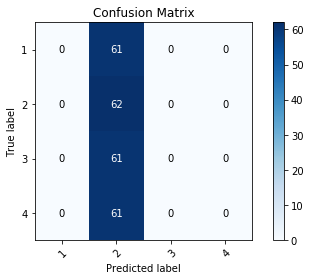

In [45]:
cm=sklearn.metrics.confusion_matrix(tobepredicted,preds)
classes = unique_labels(tobepredicted, preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes,title="Confusion Matrix",ylabel='True label',xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

<Figure size 720x540 with 0 Axes>

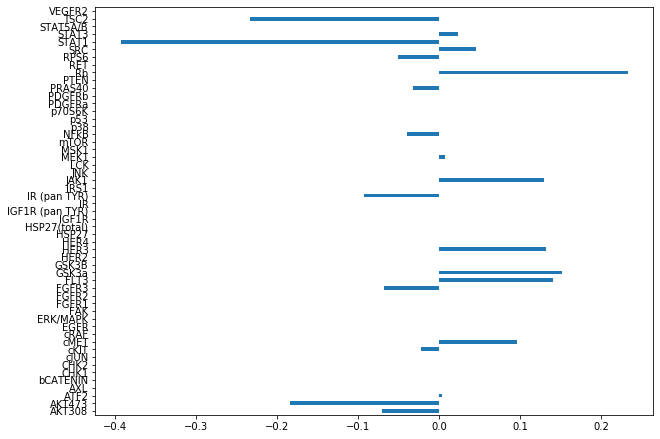

In [293]:
plt.figure(figsize=(10,7.5))
ft_importances_actual_model=pd.Series(actual_model.coef_,index=predictors.columns)
ft_importances_actual_model.plot(kind="barh")
plt.show()

In [24]:
df = pd.DataFrame({'name': predictors.columns, 'weight': actual_model.coef_})
df = df.set_index("name")
weights = df.sort_values("weight",ascending=False)
weights[abs(weights.weight) >0.05]

,weight
name,
Rb_phos,0.106223
RIMS2_mut,0.075476
ILF3_mut,0.062496
PUS7_mut,0.054319
CAPN15_mut,-0.163881
AKT473_phos,-0.233183
STAT1_phos,-0.254305


In [244]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(122, 53)

(123, 53)

(122,)

(123,)

In [254]:
binary_y_test = label_binarize(y_test, classes=[1,2,3,4])
binary_y_train=label_binarize(y_train, classes=[1,2,3,4])
n_classes = binary_y_train.shape[1]
n_classes
binary_y_train

4

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [46]:
binary_y= label_binarize(tobepredicted,classes=[1,2,3,4])
n_classes = binary_y.shape[1]
n_classes

4

In [47]:
y_score = actual_model.fit(predictors, binary_y).decision_function(predictors)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function decision_function is deprecated;  and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [48]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binary_y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    

lw = 2

In [49]:
roc_auc

{0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}

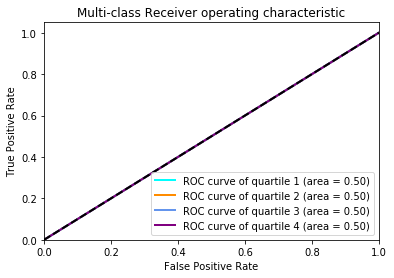

In [50]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= n_classes


# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of quartile {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [220]:
y_test.shape

(123,)

In [223]:
np.round(actual_model.score(y_test,preds)*100,2)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: shapes (1,123) and (53,) not aligned: 123 (dim 1) != 53 (dim 0)

In [166]:
predictions=lm_elastic.predict(predictors)

In [167]:
predictions[predictions<1.5]=1
predictions[(predictions>1.5) & (predictions<=2.5)]=2
predictions[(predictions>2.5) & (predictions<=3.5)]=3
predictions[predictions>3.5]=4

In [171]:
metrics.accuracy_score(tobepredicted, predictions)

0.34285714285714286

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [169]:
cm=sklearn.metrics.confusion_matrix(tobepredicted,predictions)
classes = unique_labels(tobepredicted, predictions)

[[<matplotlib.axis.YTick at 0x12cb29390>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4')],
 Text(0, 0.5, 'True label'),
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4')],
 Text(0.5, 0, 'Predicted label'),
 Text(0.5, 1.0, 'Confusion Matrix')]

[None, None, None, None, None, None, None, None]

Text(0, 0, '6')

Text(1, 0, '44')

Text(2, 0, '11')

Text(3, 0, '0')

Text(0, 1, '0')

Text(1, 1, '35')

Text(2, 1, '27')

Text(3, 1, '0')

Text(0, 2, '1')

Text(1, 2, '19')

Text(2, 2, '40')

Text(3, 2, '1')

Text(0, 3, '1')

Text(1, 3, '15')

Text(2, 3, '42')

Text(3, 3, '3')

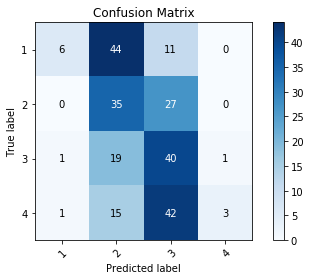

In [170]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes,title="Confusion Matrix",ylabel='True label',xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [60]:
metrics.accuracy_score(tobepredicted,predictions)

0.34285714285714286

#ROC CURVE

In [106]:
X = predictors
y = tobepredicted

In [107]:
y = label_binarize(y, classes=[1,2,3,4])
n_classes = y.shape[1]
n_classes

4

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=0)

In [110]:
from sklearn.linear_model import ElasticNet
classifier = ElasticNet(alpha=0.087)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function decision_function is deprecated;  and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [123]:
classifier.fit(X_train, y_train)

<bound method deprecated._decorate_fun.<locals>.wrapped of ElasticNet(alpha=0.087, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)>

In [178]:
classifier.decision_function(X_test).size

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function decision_function is deprecated;  and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


196

In [179]:
classifier.coef_.size

212

In [137]:
predictors.columns

Index(['AKT308', 'AKT473', 'ATF2', 'AXL', 'bCATENIN', 'CHK1', 'CHK2', 'cJUN',
       'cKIT', 'cMET', 'cRAF', 'EGFR', 'ERK/MAPK', 'FAK', 'FGFR1', 'FGFR2',
       'FGFR3', 'FLT3', 'GSK3a', 'GSK3B', 'HER2', 'HER3', 'HER4', 'HSP27',
       'HSP27(total)', 'IGF1R', 'IGF1R (pan TYR)', 'IR', 'IR (pan TYR)',
       'IRS1', 'JAK1', 'JNK', 'LCK', 'MEK1', 'MSK1', 'mTOR', 'NFkB', 'p38',
       'p53', 'p70S6K', 'PDGFRa', 'PDGFRb', 'PRAS40', 'PTEN', 'Rb', 'RET',
       'RPS6', 'SRC', 'STAT1', 'STAT3', 'STAT5A/B', 'TSC2', 'VEGFR2'],
      dtype='object')

In [135]:
plt.figure(figsize=(10,7.5))
ft_importances_classifier=pd.Series(classifier.coef_,index=predictors.columns)
ft_importances_classifier.plot(kind="barh")
plt.show()

<Figure size 720x540 with 0 Axes>

Exception: Data must be 1-dimensional

<Figure size 720x540 with 0 Axes>

In [112]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [160]:
roc_curve(tobepredicted,predictions)

ValueError: Data is not binary and pos_label is not specified

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic example')

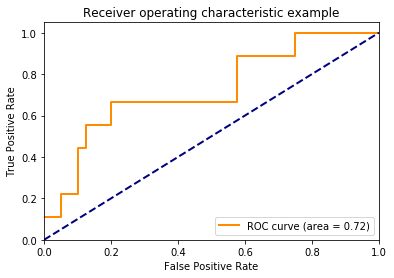

In [113]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [114]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Some extension of Receiver operating characteristic to multi-class')

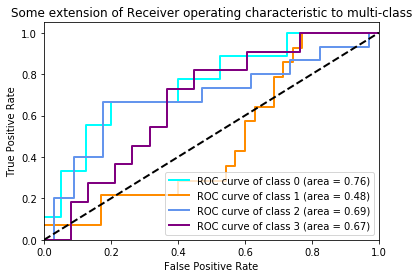

In [98]:
# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [99]:
roc_auc[0]

0.7555555555555555